# 2022 Kaggle Machine Learning & Data Science Survey
Data set and other information can be found at the following link.
https://www.kaggle.com/competitions/kaggle-survey-2022/data

##Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(16,11)})

##Dataset
Download the dataset CSV file and convert it into a Pandas dataframe

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1Hedgm-r563GDXKvahXUUBhSdf3q1dzaJ"
data = pd.read_csv(url)
titles = list(data.iloc[0])
data = data.drop(0)
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


##Multiple Selection Function
Because multiple selection questions have been divided into multiple columns in the dataset, we need an easy way to combine the counts from these columns into a single graph.

In [ ]:
def MultiSelectGraph(start, end, width=16, height=10):
    sns.set(rc={'figure.figsize':(width,height)})
    languages = pd.DataFrame(data.iloc[:,start:end])
    titles2 = {}

    # Columns titles are split with the question and answer separated by a ' - '.
    # This loop extracts the answer and adds them to a list.
    for i, col in enumerate(languages):
        titles2[col] = titles[start+i].split(' - ')[-1]
    languages.rename(columns=titles2, inplace=True)
    sns.barplot(x=languages.count(), y=languages.columns, order=languages.count().sort_values(ascending=False).index)

##Country of residence
Histogram of responses to the question, "In which country do you currently reside?"

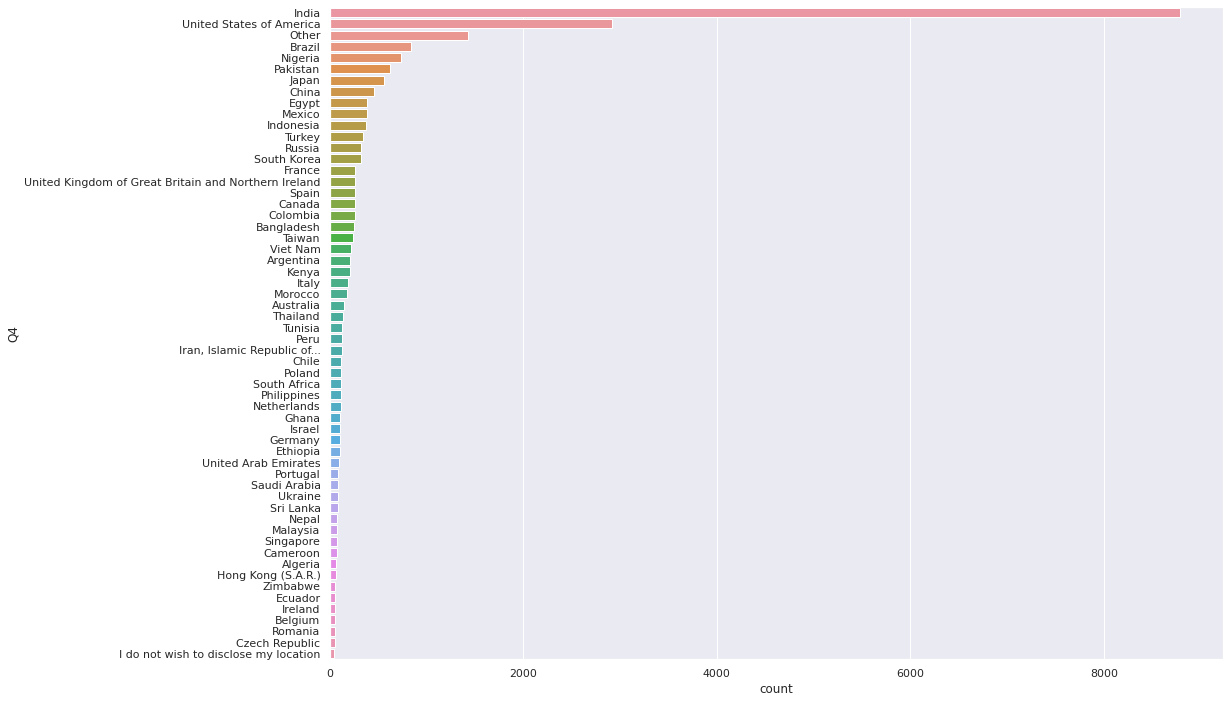

In [ ]:
sns.set(rc={'figure.figsize':(16,12)})
sns.countplot(data=data['Q4'], y=data['Q4'], order=data['Q4'].value_counts().index)

##Age
Histogram of responses to the question, "What is your age (# years)?" for participants in the US.

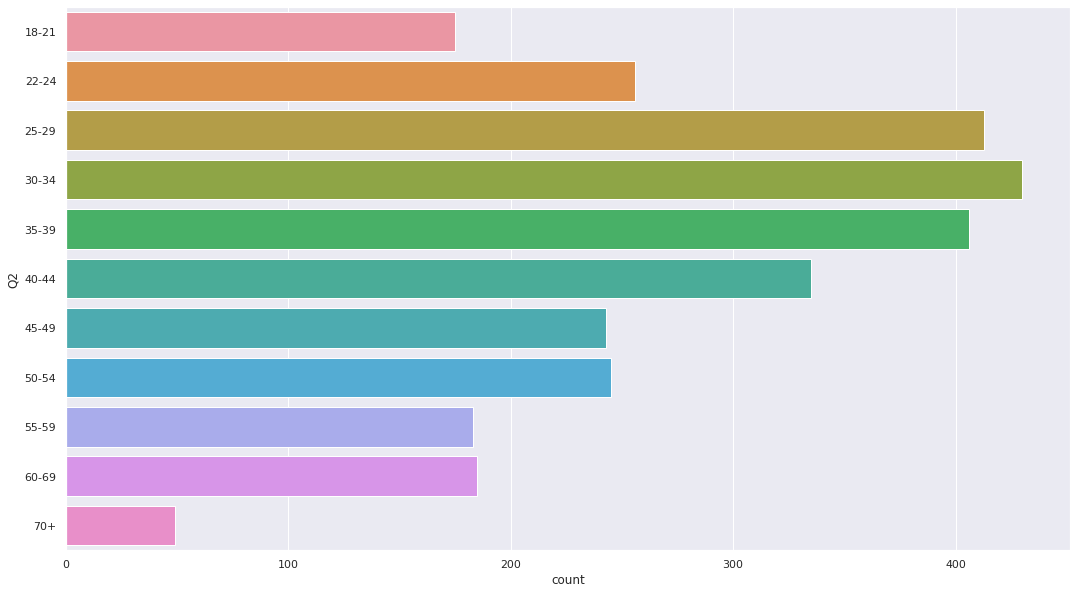

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.countplot(data=data.loc[data['Q4'] == 'United States of America'], y='Q2', order=pd.Series(data['Q2'].loc[data['Q4'] == 'United States of America'].unique()).sort_values())

##Student Status
Histogram of responses to the question, "Are you currently a student? (high school, university, or graduate)" for participants in the US.

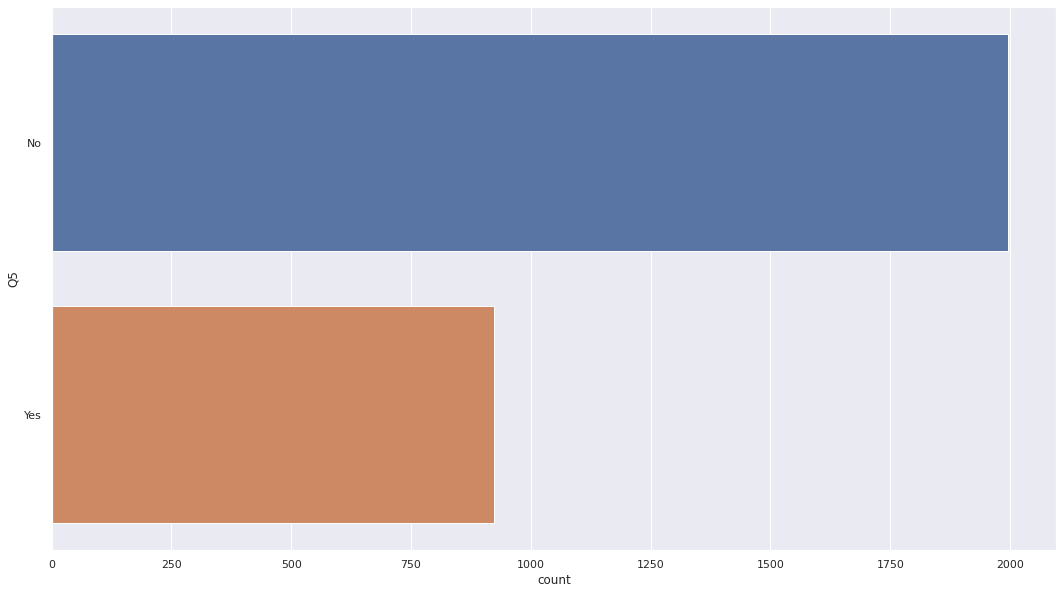

In [ ]:
sns.countplot(data=data.loc[data['Q4'] == 'United States of America'], y='Q5', order=data['Q5'].loc[data['Q4'] == 'United States of America'].value_counts().index)

## Student Status vs. Age
Histogram plotting student status against age for participants in the US.

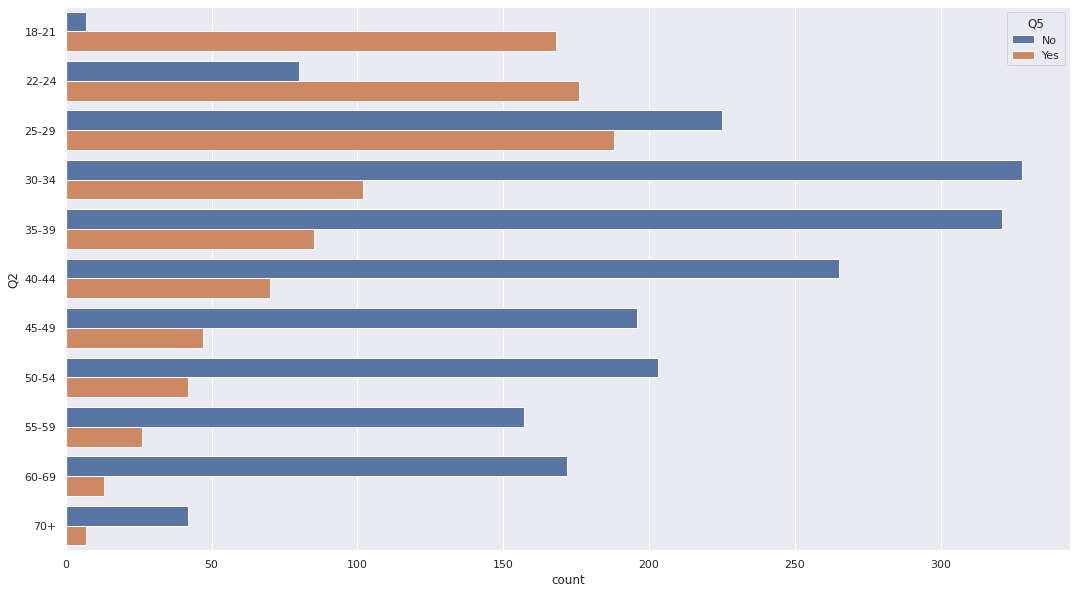

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.countplot(data=data.loc[data['Q4'] == 'United States of America'], y='Q2', hue='Q5', order=pd.Series(data['Q2'].loc[data['Q4'] == 'United States of America'].unique()).sort_values())

##Job Title
Responses to the question, "Select the title most similar to your current role (or most recent title if retired)" for participants in the US.

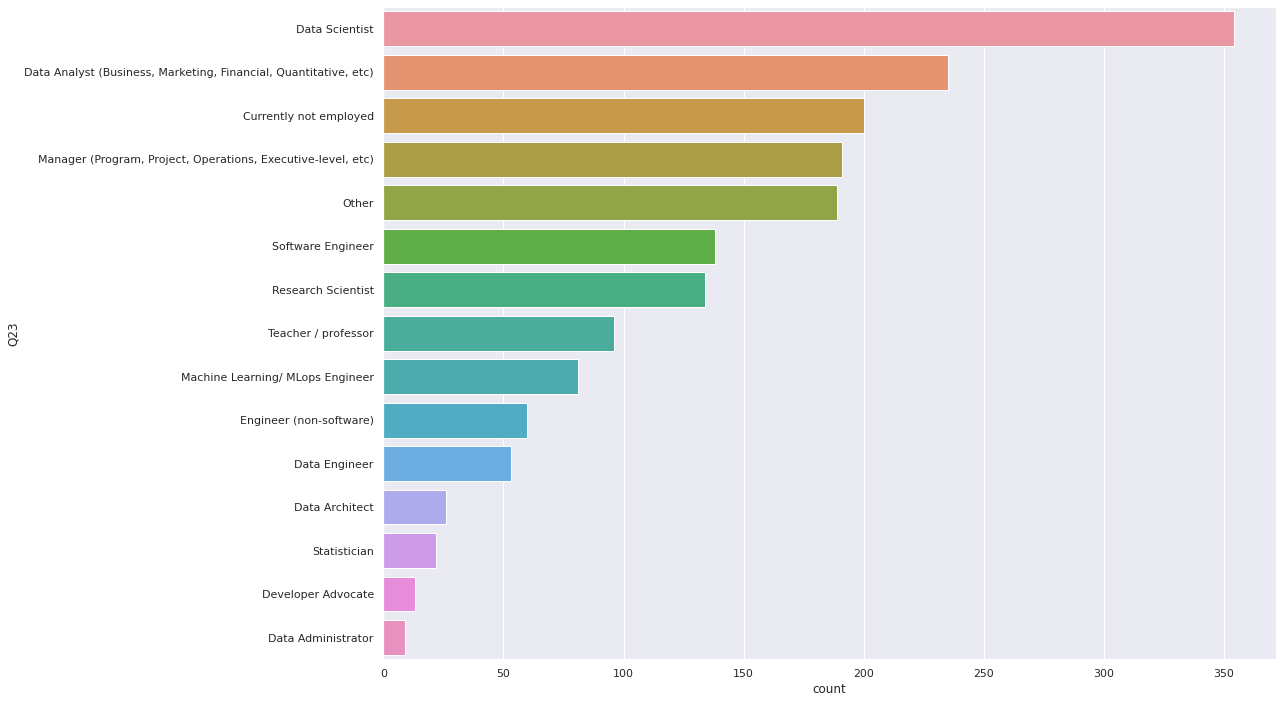

In [ ]:
sns.set(rc={'figure.figsize':(16,12)})
sns.countplot(data=data.loc[data['Q4'] == 'United States of America'], y='Q23', order=data['Q23'].loc[data['Q4'] == 'United States of America'].value_counts().index)

##Employed by age
Participants who are not students and reported being employed, divided by age, in the US.

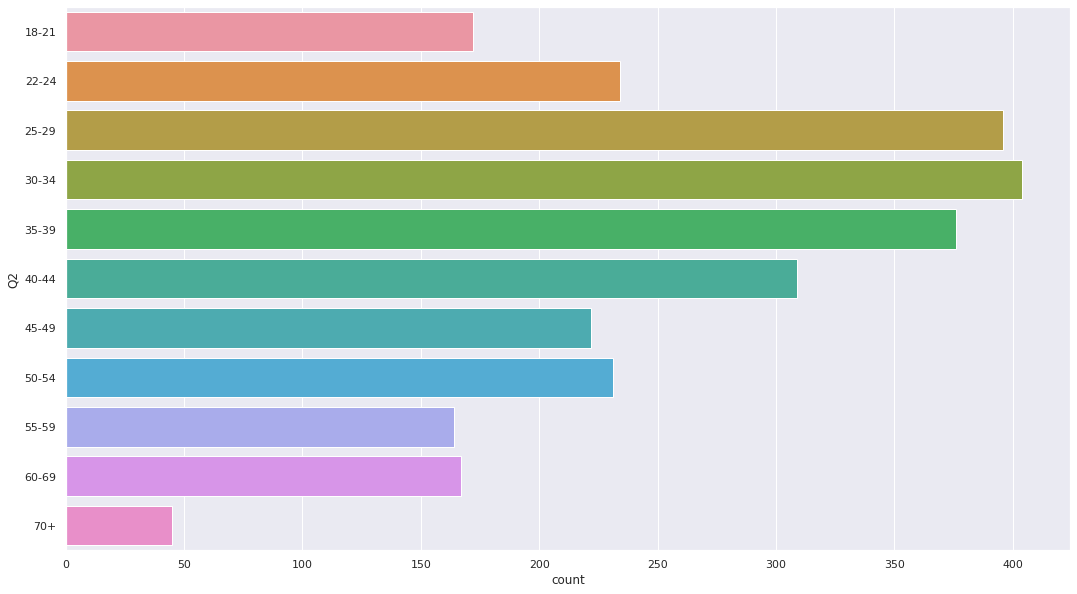

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.countplot(data=data.loc[(data['Q4'] == 'United States of America') & (data['Q23'] != 'Currently not employed')], y='Q2', order=pd.Series(data['Q2'].unique()).sort_values())

##Field of employment
Responses to the question, "In what industry is your current employer/contract (or your most recent employer if retired)?" for participants in the US.

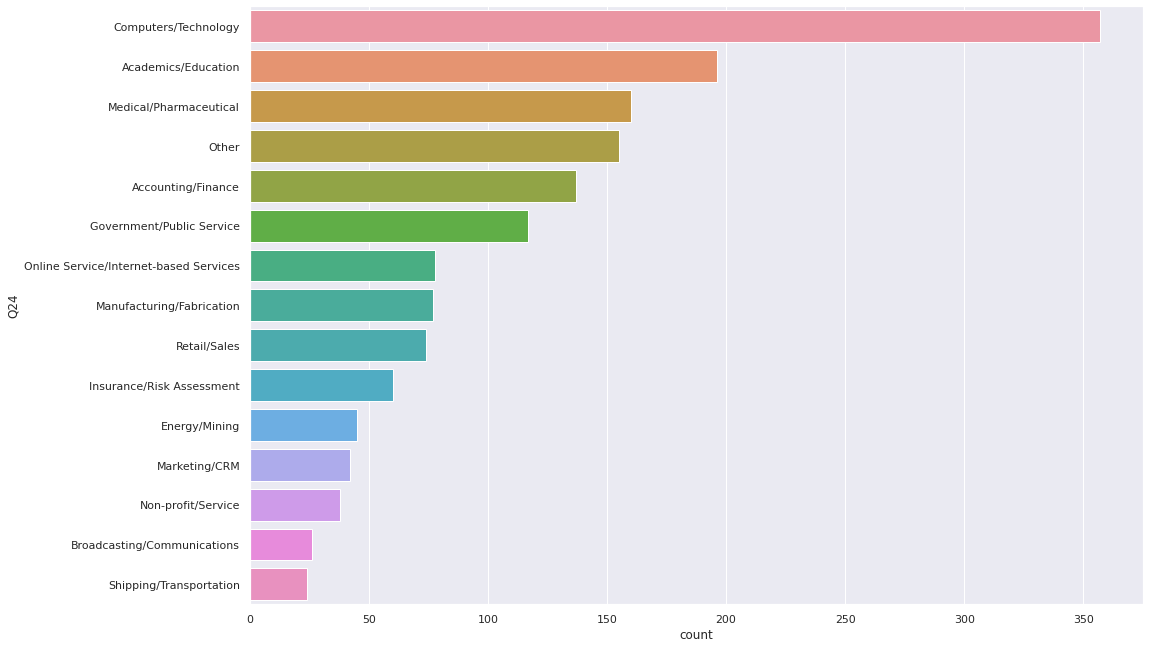

In [ ]:
sns.set(rc={'figure.figsize':(16,11)})
sns.countplot(data=data.loc[data['Q4'] == 'United States of America'], y='Q24', order=data['Q24'].loc[data['Q4'] == 'United States of America'].value_counts().index)

##Income
Responses to the question, "What is your current yearly compensation (approximate $USD)?" for participants in the US who are not students and are currently employed.

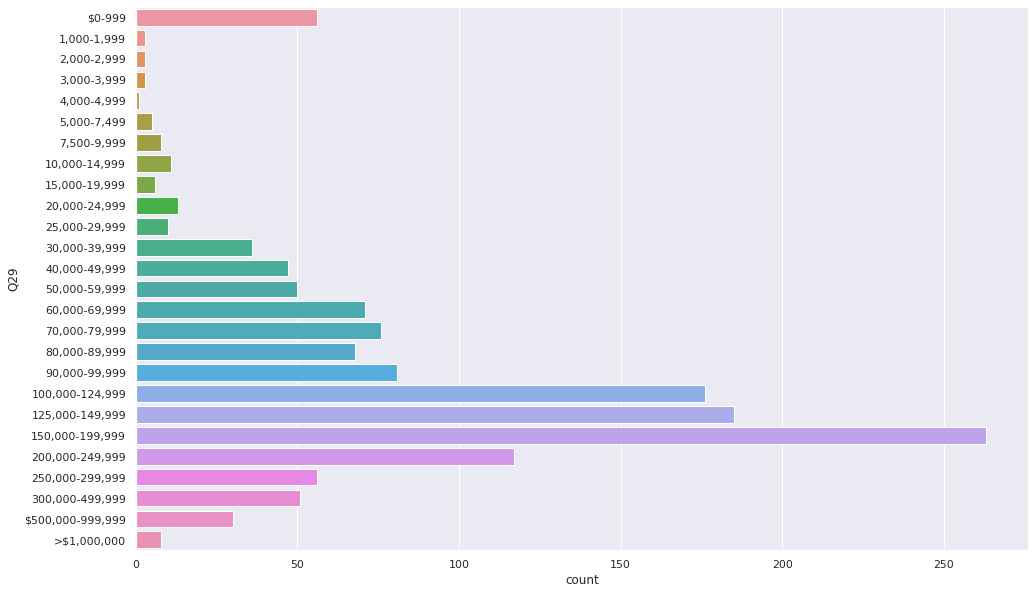

In [ ]:
income_list = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999', 
'20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', 
'80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999',
'300,000-499,999', '$500,000-999,999', '>$1,000,000']

sns.set(rc={'figure.figsize':(16,10)})
sns.countplot(data=data.loc[(data['Q4'] == 'United States of America') & (data['Q23'] != 'Currently not employed') & (data['Q5'] == 'No')], y='Q29', order=income_list)

##Gender and employment
Responses to the question, "What is your gender?" for participants in the US.

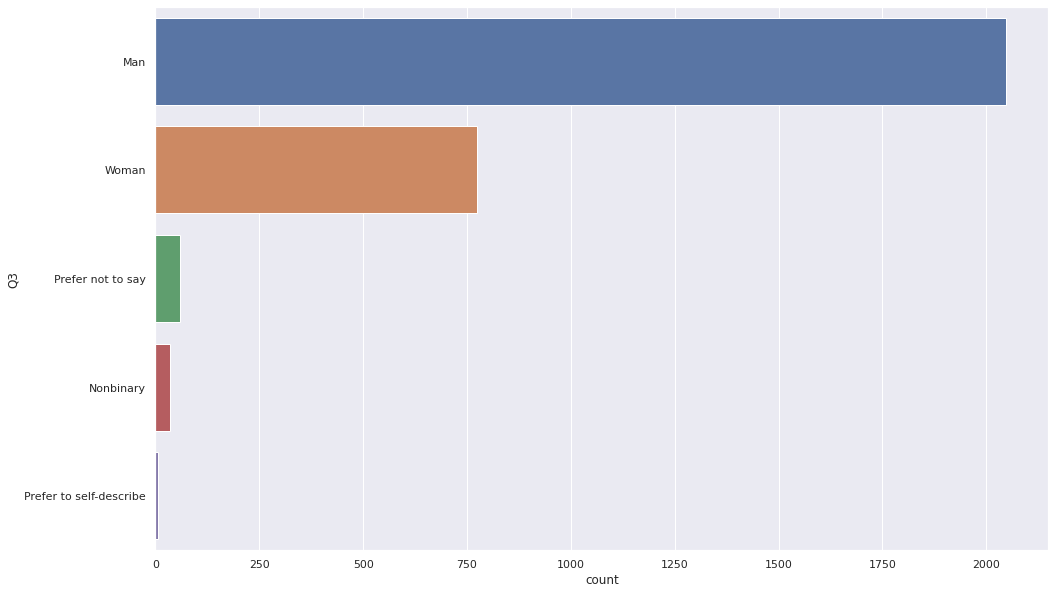

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.countplot(data=data.loc[data['Q4'] == 'United States of America'], y='Q3', order=data['Q3'].loc[data['Q4'] == 'United States of America'].value_counts().index)

##Student status and gender (US)

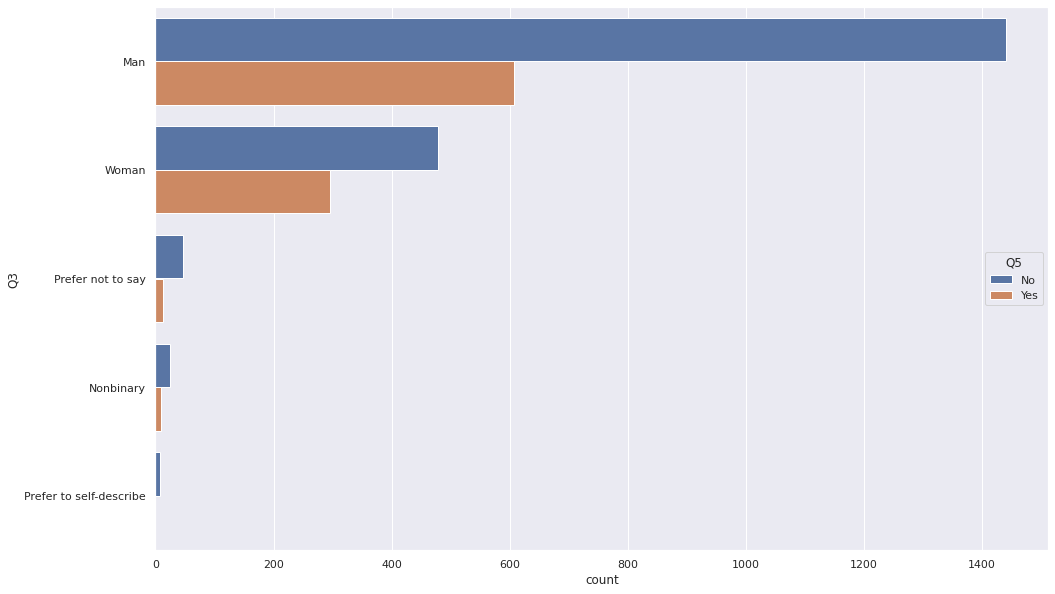

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.countplot(data=data.loc[data['Q4'] == 'United States of America'], y='Q3', hue='Q5', order=data['Q3'].value_counts().index)

##Age and gender (US)

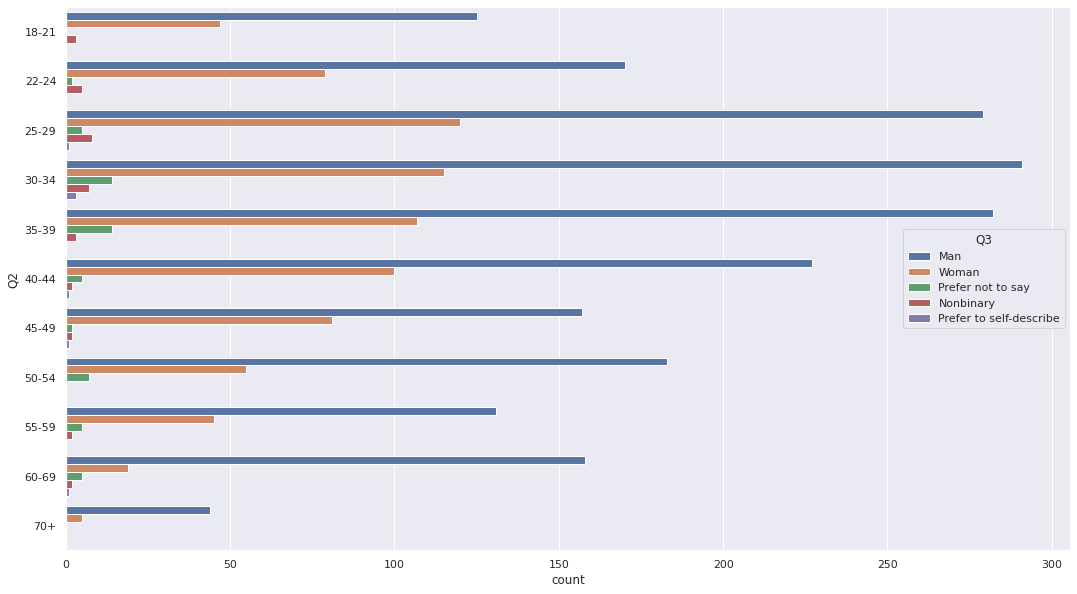

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.countplot(data=data.loc[data['Q4'] == 'United States of America'], y='Q2', hue='Q3', hue_order=data['Q3'].value_counts().index, order=pd.Series(data['Q2'].unique()).sort_values())

##Employment and gender (US)
Respondents who are not students and are currently employed, by gender

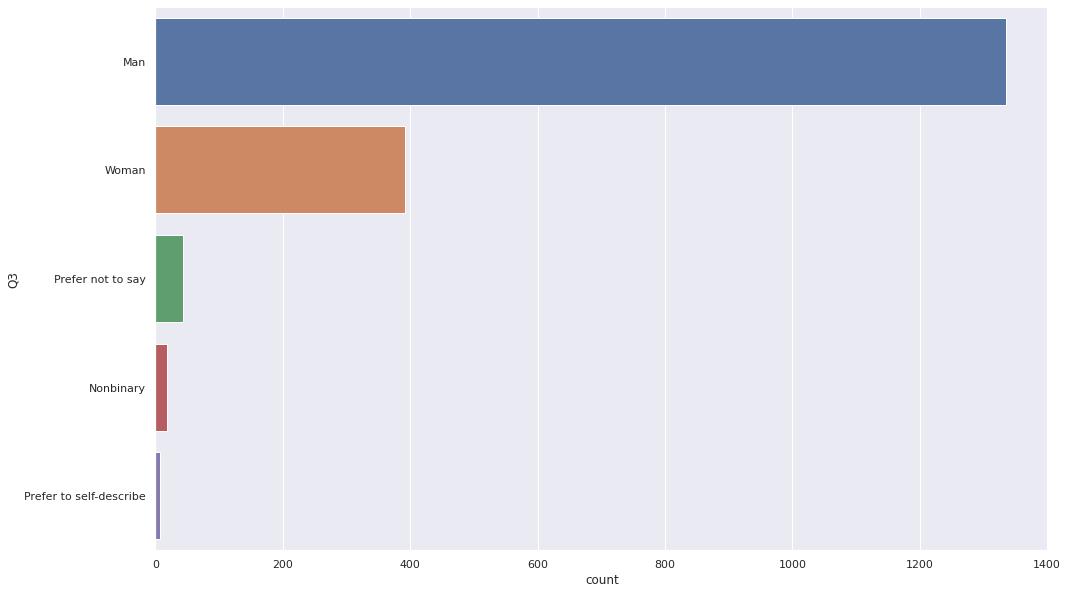

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.countplot(data=data.loc[(data['Q4'] == 'United States of America') & (data['Q23'] != 'Currently not employed') & (data['Q5'] == 'No')], y='Q3', order=data['Q3'].value_counts().index)

##Income and gender
Income values for participants who are currently employed, by gender

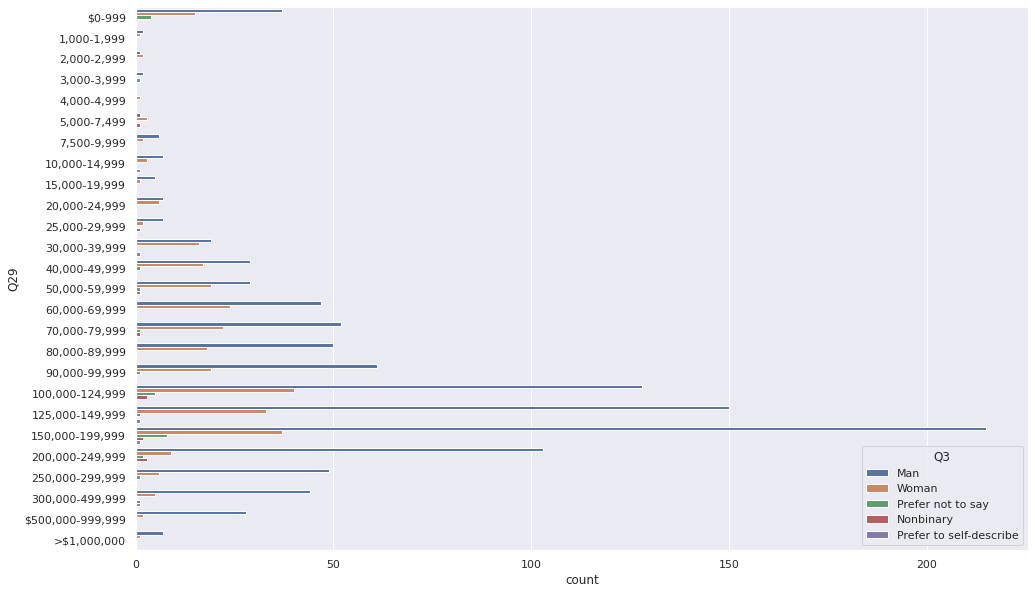

In [ ]:
income_list = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999', 
'20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', 
'80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999',
'300,000-499,999', '$500,000-999,999', '>$1,000,000']

sns.set(rc={'figure.figsize':(16,10)})
sns.countplot(data=data.loc[(data['Q4'] == 'United States of America') & (data['Q23'] != 'Currently not employed') & (data['Q5'] == 'No')], y='Q29', hue='Q3', hue_order=data['Q3'].value_counts().index, order=income_list)

##Industry by gender (US)

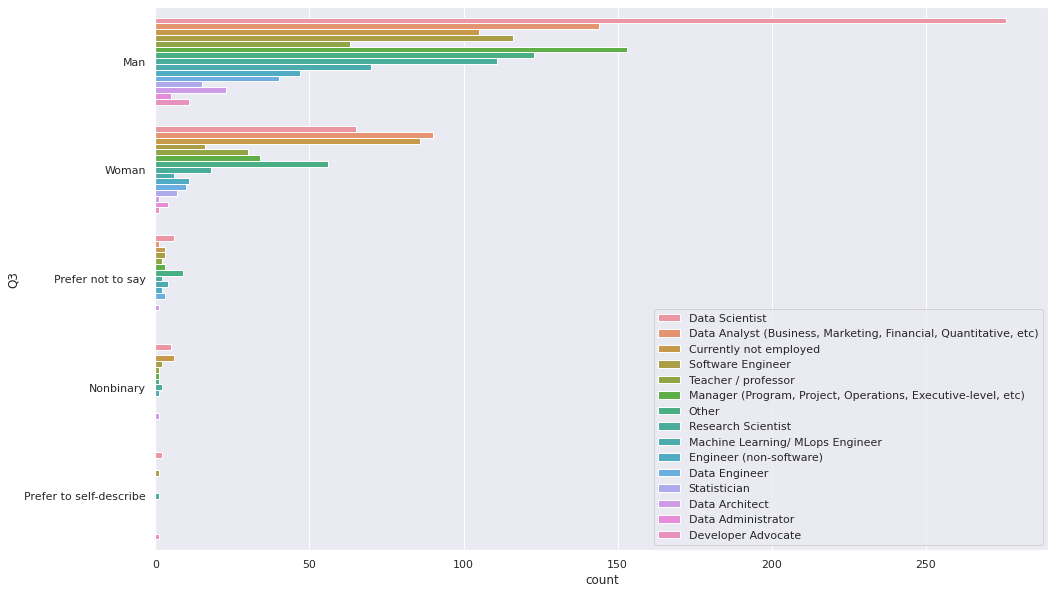

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.countplot(data=data.loc[data['Q4'] == 'United States of America'], y='Q3', hue='Q23', hue_order=data['Q23'].value_counts().index, order=data['Q3'].value_counts().index)
plt.legend(loc=4)

##Preferred programming languages (Global)

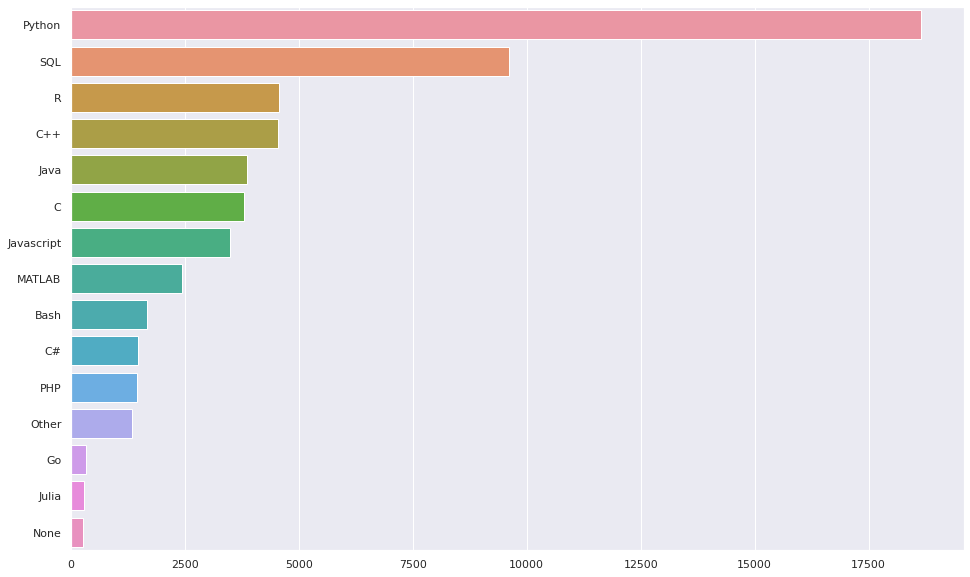

In [ ]:
MultiSelectGraph(30, 45)

##Preferred IDE (Global)

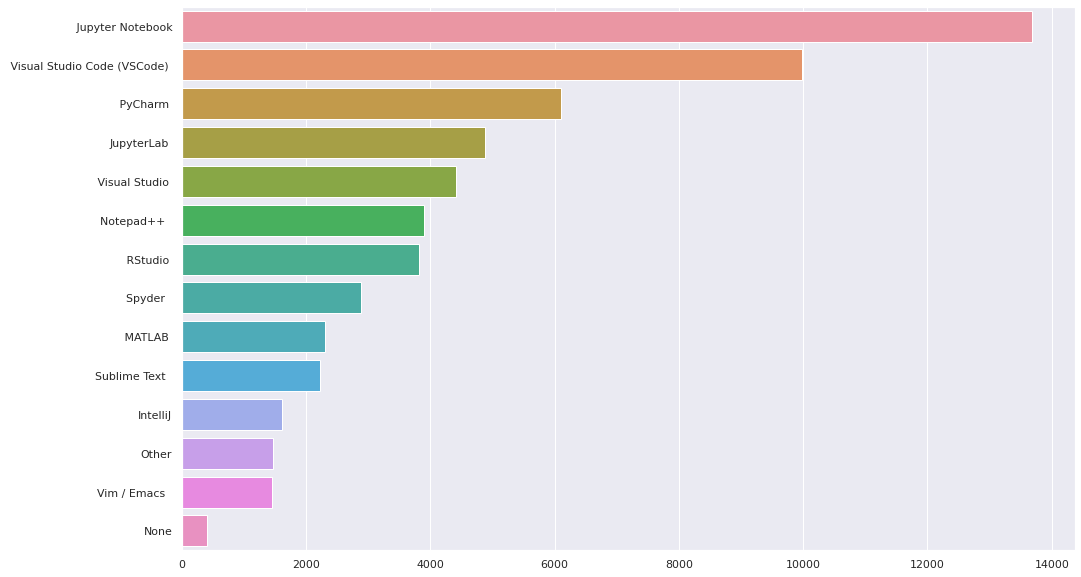

In [ ]:
MultiSelectGraph(45, 59)

##Preferred cloud services (Global)

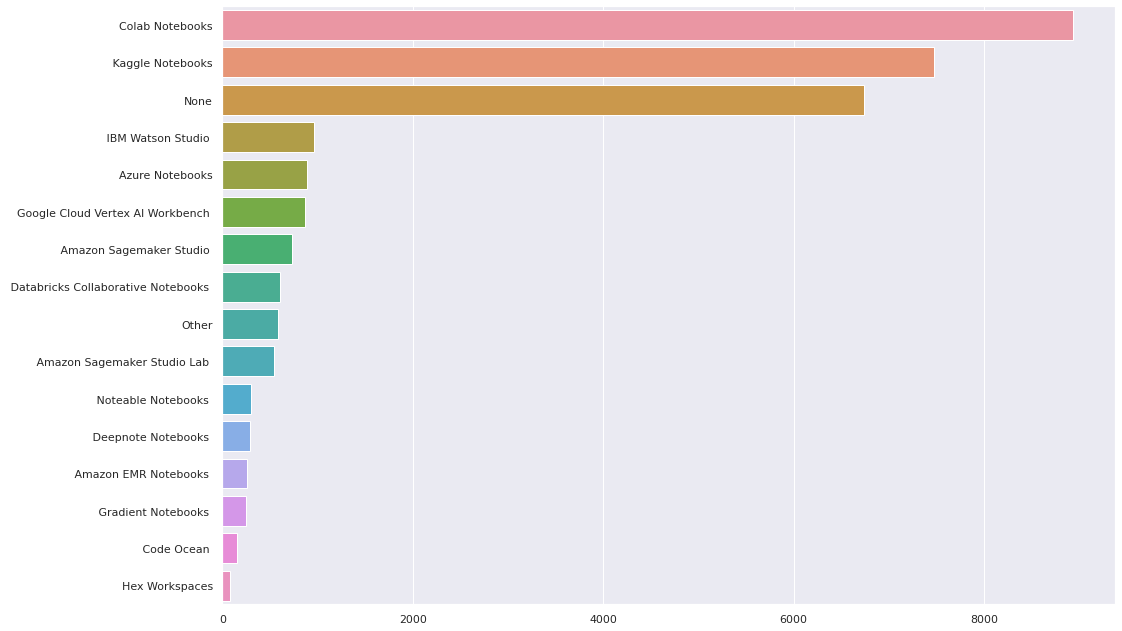

In [ ]:
MultiSelectGraph(59, 75, 16, 11)

##Preferred visualization libraries (global)

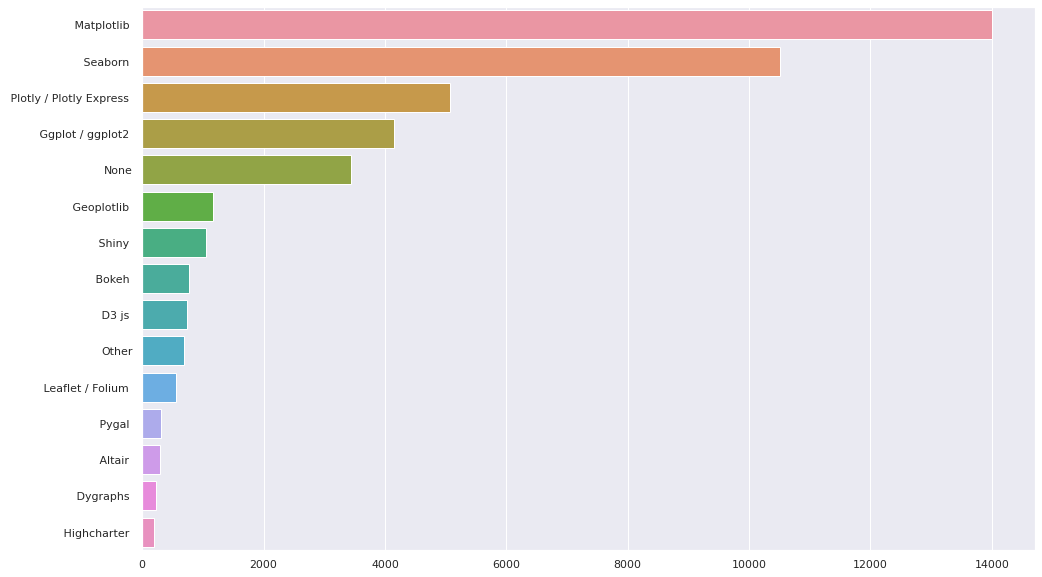

In [ ]:
MultiSelectGraph(75, 90)

##Preferred AI/ML libraries (Global)

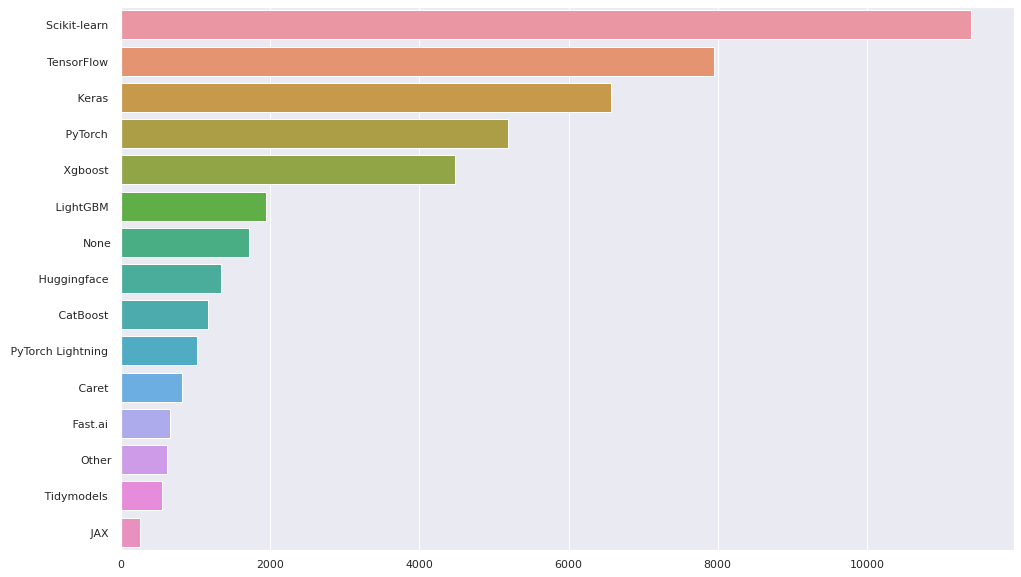

In [ ]:
MultiSelectGraph(91, 106)

##Preferred AI algorithms (Global)

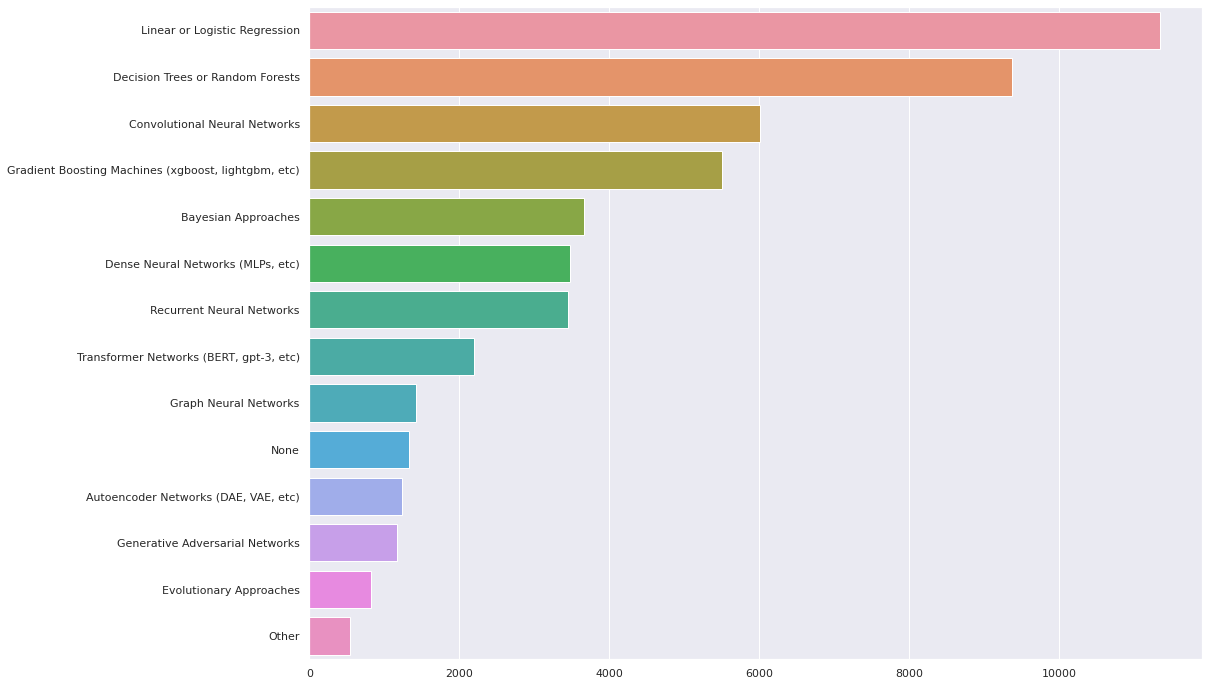

In [ ]:
MultiSelectGraph(106, 120, 16, 12)